In [1]:
import os
import random
import sys
from pathlib import Path

from arcgis.learn import prepare_data
from arcgis.learn.text import EntityRecognizer
import spacy

In [2]:
dir_prj = Path('./').absolute().parent.parent
dir_src = dir_prj.parent/'geosaurus'/'src'
dir_raw = dir_prj/'data'/'raw'

fl_trn = dir_raw/'docstring_training.json'

fl_trn.exists()

True

In [3]:
data = prepare_data(path=fl_trn, dataset_type='ner_json')

                1. If your data has an address field, pass your address field name as address tag in class mapping 
                e.g. - data=prepare_data(dataset_type=ds_type,path=training_data_folder,
			                    class_mapping={address_tag:address_field_name})
                2. Else no action is required, if your data does not have any address information.


In [4]:
data.show_batch()

,text,Code Block,Description,Parameter Description,Parameter Name,Return Value
0,Retrieve a Spatially Enabled DataFrame of geom...,,,,,
1,Enrich a spatially enabled dataframe using eit...,,[Enrich a spatially enabled dataframe using ei...,[Spatially Enabled DataFrame with geography_le...,"[data, enrich_variables, data_collections]",[Spatially Enabled DataFrame with enriched dat...
2,Retrieve a Spatially Enabled DataFrame of geom...,,,,,
3,Retrieve a Spatially Enabled DataFrame of geom...,,,,,
4,Get a DataFrame at an available geography_leve...,,[Get a DataFrame at an available geography_lev...,[Either the geographic_level or the index of t...,"[geography, selector, selection_field, query_s...",[pd.DataFrame as Geography object instance wit...
5,"Project to a new spatial reference, applying a...",,,,,
6,Country objects are instantiated by providing ...,[from dm import Country\n\n # instantiate a...,[Country objects are instantiated by providing...,"[Three letter country identifier., Either 'loc...","[name, source]",
7,Helper to handle creation of sql queries for g...,,,,,


In [5]:
ner = EntityRecognizer(data, backbone='xlnet-large-cased')

ner

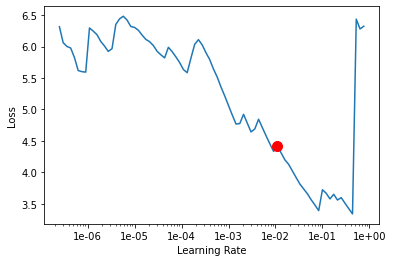

0.01096478196143185

In [6]:
lr = ner.lr_find()

lr

In [7]:
ner.fit(epochs=15, lr=lr, early_stopping=True)

epoch,train_loss,valid_loss,precision_score,recall_score,f1_score,time
0,3.103145,2.090569,0.848253,0.651368,0.602989,00:03
1,1.906779,1.398657,0.859074,0.663074,0.641179,00:03
2,1.189446,1.016729,0.795663,0.724168,0.705179,00:03
3,0.863557,2.969879,0.833389,0.714484,0.669137,00:03
4,0.811947,2.772520,0.879158,0.691158,0.680337,00:03
5,0.912032,1.342950,0.833432,0.706484,0.694989,00:03
6,0.857421,3.732830,0.820295,0.710526,0.672758,00:03
7,0.935763,1.084875,0.858611,0.796084,0.802316,00:03


Epoch 8: early stopping


In [8]:
ner.unfreeze()
ner.fit(epochs=10, early_stopping=True)

Finding optimum learning rate.


epoch,train_loss,valid_loss,time


RuntimeError: CUDA out of memory. Tried to allocate 126.00 MiB (GPU 0; 11.00 GiB total capacity; 8.26 GiB already allocated; 1.59 MiB free; 8.70 GiB reserved in total by PyTorch)

In [ ]:
ner.metrics_per_label()